![Cradlepoint](logo.svg)

---

# Introduction:

## Welcome to the Cradlepoint Container Labs!

### In these labs you will learn about containers and how to orchestrate them from NetCloud Manager.  You will learn how to run existing container images, build your own images, and use the SDK library to integrate with the NCOS API from inside your container.

### These labs leverage JupyterLab (This interface) and Jupyter Notebooks (This file format).

#### Throughout the labs, cells (input boxes) are provided for you to type code into.  Press **shift-enter** to execute, or click the play button on the toolbar at the top.  Output will be displayed below the cell.  Your code stays resident in memory so you can run code one line at a time or in chunks and it all works together.

> [Take a tour of the JupyterLab interface and Notebooks  
(**Help Menu** -> **Welcome Tour** and **Notebook Tour**)](https://jupyter.org/try-jupyter/lab?path=notebooks%2FIntro.ipynb)

### New to Python or need a refresher?
> [Check out the Python3 Bootcamp included in this lab](/lab/tree/5.%20Python3%20Bootcamp)

---

# **PART 1** - Introduction

#### This section will cover:

### What is a Container?

### Using Containers on Cradlepoint devices:
- #### Supported Devices
- #### Device Licensing
- #### Enabling Container Orchestration
- #### Device and Group Configuration
- #### Project Settings (config tab)

### Compose and Compose Builder:
- #### Docker Compose (YAML)
- #### Networks
- #### Volumes
- #### Services
    - Basic
    - Command
    - Volumes & Devices
    - Networks
    - Health
- #### Compose Summary

### Monitoring and Troubleshooting
- #### Group Dashboard
- #### Device Dashboard
- #### Logging

---

## What is a Container?

#### Containers are lightweight, standalone, executable packages of software that include everything needed to run an application: code, runtime, system tools, system libraries and settings.  

#### Containers are similar to virtual machines but share the host machine's kernel, use less resources, and are designed for a single specific task. 

---

## Using Containers on Cradlepoint devices:

### Supported Devices

The following devices support containers on the architecture shown:
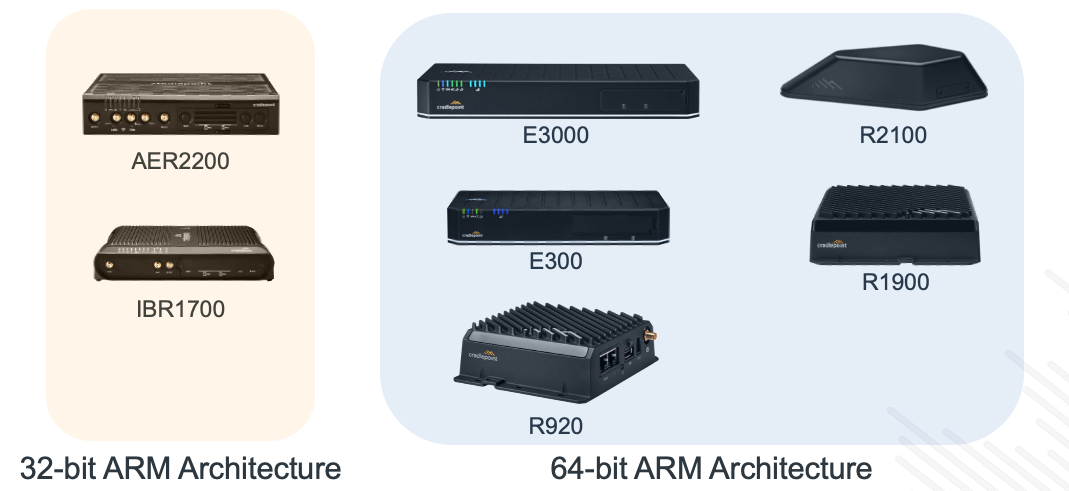

### Device Licensing

A NetCloud Advanced Upgrade license is required for all devices running containers.  Navigate to the License tab of the device dashboard in NCM to view the current license and upgrade if necessary.  

### Enable Container Orchestration

The NCM Account System Administrator (root admin) can navigate to the Tools page in NCM and enable the NetCloud Container Orchestrator.  This enables licensed devices to pull down container images configured.  

### Device and Group Configuration

Containers are commonly configured at the group level.  When configured at the group level, all devices in the group will get the same configuration and setup the same container.  
> If you want to deploy a container on a single device, you can also edit the device configuration and setup containers there as well.  

To deploy containers across a group:  

Navigate to the Groups page in NCM, select your group, and click Configuration > Edit Configuration.  

In the configuration editor, navigate to System > Containers > Projects, and click Add.  

### Project Settings (config tab)

When you add a new project you must give it a name.  

You can also enable/disable the project using the checkbox.  

And you can set the "Update Interval" which is how often (in seconds) it will check for container image updates and apply them automatically.  If set to 0 or left blank it will not check for updates.  

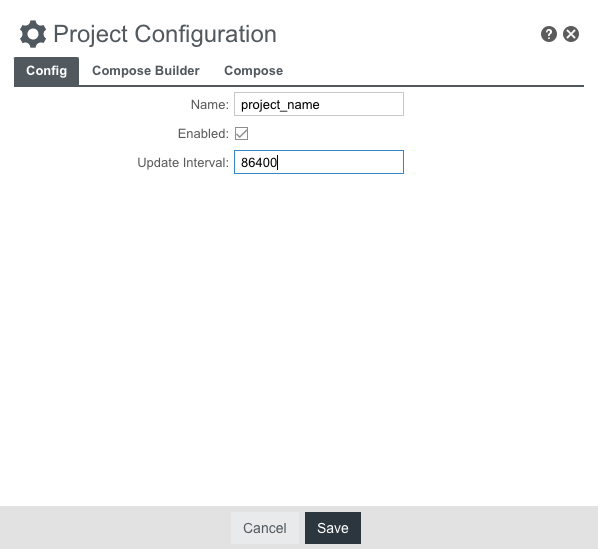

---

## Compose and Compose Builder

### What is Compose?

Docker Compose is a YAML (https://yaml.org/) formatted document that describes how to run docker containers.  In the end it gets translated into docker commands that run each ‘service’ as a container.  

For example, here is the Compose used for this container:  

```yaml
version: '2.4'  
services:  
  ext:  
    image: 'cpcontainer/extensibility'  
    networks:
      lannet:
        ipv4_address: 192.168.0.2
    volumes:  
     - ${CONFIG_STORE}  
     - 'shared-data:/home/jovyan'
volumes:  
  shared-data:  
    driver: local
networks:
  lannet:
    driver: bridge
    driver_opts:
      com.cradlepoint.network.bridge.uuid: 00000000-0d93-319d-8220-4a1fb0372b51
    ipam:
      driver: default
      config:
        - subnet: 192.168.0.0/24
          gateway: 192.168.0.1
```

## Compose Builder

Rather than writing your project in compose, you can use the compose builder to easily create your project's compose.  

> #### Click on the Compose Builder tab of your project.

> #### When using the Builder, you must define your networks and volumes (disk) before adding services (containers) that use them.  

---
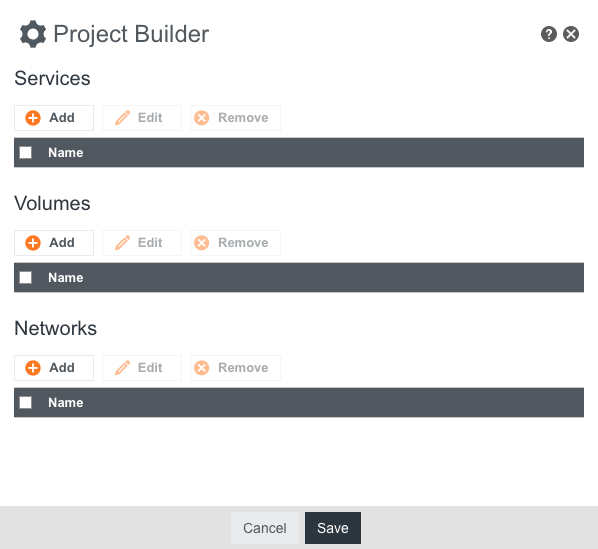

---

### Volumes

Used to specify persistent data stores that can be used inside a container.  

Data stored in volumes survives container or router reboots.  

- Click Add and give the volume a name. 
- Driver and driver options can be left at default.  
- Click Save.  

---
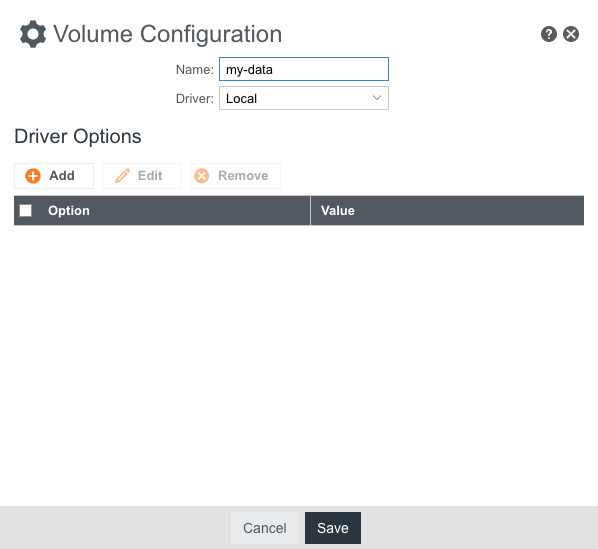

---

### Networks 

Used to define networks (e.g. Primary LAN) to make them available for use with containers.  

- Click Add and select the network from the drop down.
- Click Save.
> Not required. A container not bound to a LAN can still be reachable using exposed ports.

---
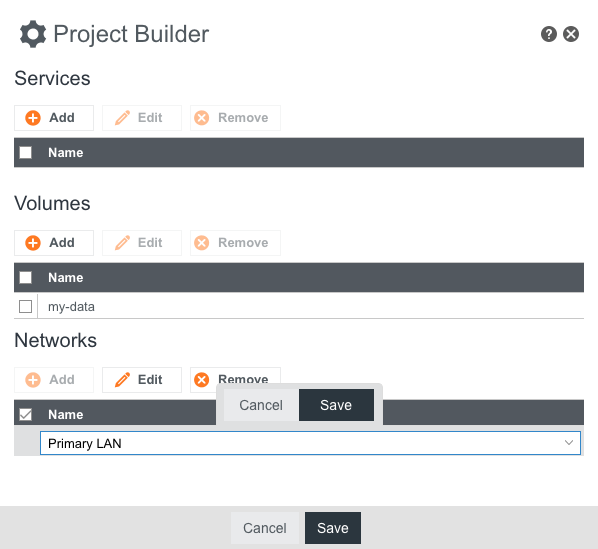

---

### Services

Used to specify one or more containers to run.  

- Click Add to add a service (container).

#### Services - Basic Tab:

- A container needs at least a **name** and **image**.
- The **image** format corresponds with the **_repo/name:tag_** description of an image and can be found in dockerhub. 

Optionally configure under the Basic tab:
- **Network Mode** – Bridged (has a network) or None (no network access)
- **Port Mapping** – If using Bridged mode networking, optionally specify ports to forward into the container.  
    - The format is **_remote_port:container_port_** for example to expose port 8080 to forward to a webserver listening on port 80 in the container, specify **_8080:80_**  

> Security Note: This will also expose the port on all interfaces (including the WAN interface), which may not be desired. We’ll discuss an alternate way of exposing a container to a network shortly.

---

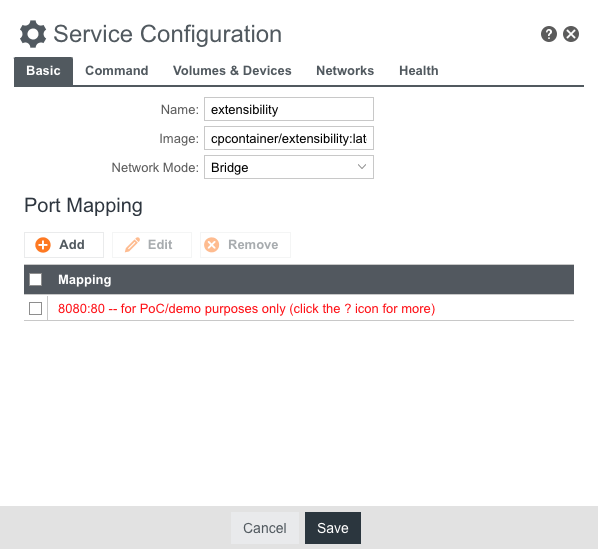

---

#### Services - Command Tab:

Optionally configure Command entries:
- **Command** - Overrides the command passed into the entrypoint script, without an entrypoint script specified, the command is essentially run as is.
- **Entrypoint** - Runs when the container starts up and ‘command’ is passed as the argument. Can specify a different entrypoint script if desired.
- **Working Directory** - the default working directory for processes running inside the container.
- **User** - the UID and GUID of the user running the processes inside the container. Takes the format **_UID:GUID_**
> It’s good security practice to always use a non-root user when running a container

Optionally configure Environment Variables:
- Click Add add enter the Environment Variable name and value.
- Takes the format **_VARIABLE=value_**

---

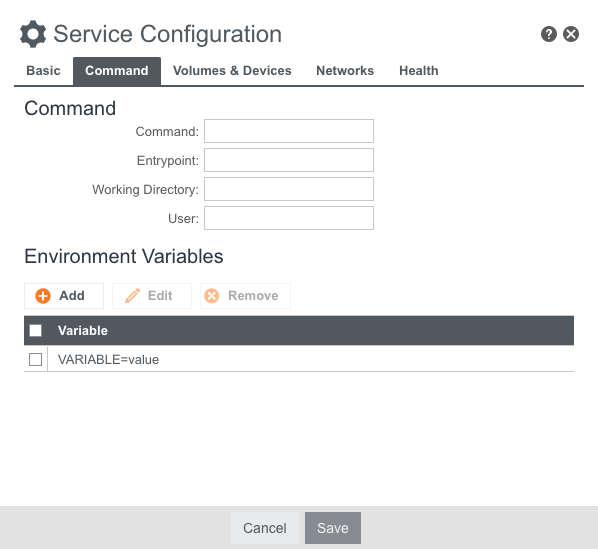

---

#### Services - Volumes and Devices:

**Volumes** specify persistent storage for use in a container.  
Containers are ephemeral and all data not stored in a volume will be lost when the container restarts or the router reboots.  
Takes the format **_volume_name:/path/inside/container_**
> Example data:/home/my_data

- Click Add then select from the list:
    - User-defined volumes ("data)
    - Preset volumes ("Config Store" and "USB Storage")
    
- For user-defined volumes, add a colon (:) and the /path/inside/container (data:/home/my_data).    
> If you do not specify a path inside the container it will assume it matches the volume name (data:/data)  

> You can specify other params like readonly: (data:/home/my_data:ro) 

Preset Volumes:  
- “Config Store” generates “/var/tmp/cs.sock:/var/tmp/cs.sock”
- “USB Storage” generates “/var/media:/var/media”

**Devices** will mount host devices into the container.  
- Click Add then select from the list:
    - “Bluetooth Serial Port”
    - “USB Serial Port”
    - specify path: “/dev/ttyS1”, “/dev/ttyUSB0”, “/dev/ttyBLE”

---

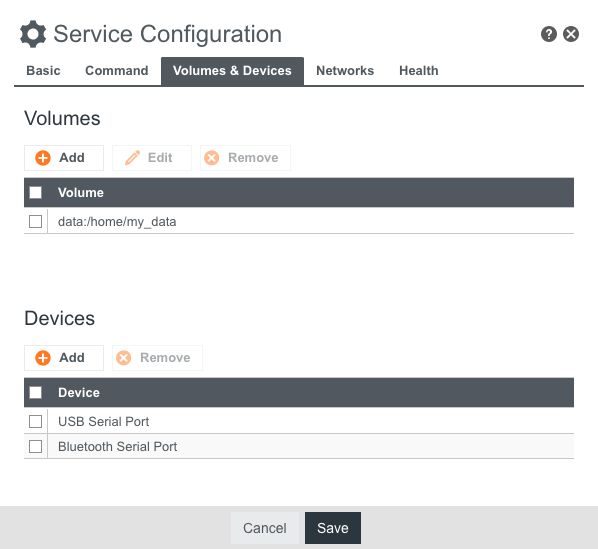

---

#### Services - Networks:

References the user-defined networks from the main project page.  
Used to ‘bridge’ a container into the specified LAN. Effectively allowing a container to act as a “client” connected to that LAN.  
> Independent of using the forwarded ports functionality.  

- Specify the network and the IP Address to use on that network (e.g. 192.168.0.2).  
    - If an IP Address is not specified the container will request one via DHCP.

---



---

#### Services - Health:

Health Checks are used to periodically monitor a condition.  
If the conditional fails, the container is reported as unhealthy.  
Restart sets the condition when the container should be restarted.  
- By default the container will never restart. 
- “On-Failure” automatically restarts the container if it fails.  
- “Unless Stopped” will always restart unless deliberately stopped.  

---



---

### Compose Summary

After clicking ‘save’ on the project builder the Compose tab is selected.  
The generated YAML will appear here.  
The YAML generated here can be copied, modified, and pasted back in.  
YAML configuration can be input directly without using the builder as well.  

> It is common to simply copy and paste the compose directly into a project.

Again, here is the compose for this project as an example:  

```yaml
version: '2.4'  
services:  
  ext:  
    image: 'cpcontainer/extensibility'  
    networks:
      lannet:
        ipv4_address: 192.168.0.2
    volumes:  
     - ${CONFIG_STORE}  
     - 'shared-data:/home/jovyan'
volumes:  
  shared-data:  
    driver: local
networks:
  lannet:
    driver: bridge
    driver_opts:
      com.cradlepoint.network.bridge.uuid: 00000000-0d93-319d-8220-4a1fb0372b51
    ipam:
      driver: default
      config:
        - subnet: 192.168.0.0/24
          gateway: 192.168.0.1
```

---

## Monitoring and Troubleshooting

The **group dashboard** has a container tab that gives information regarding the state of the containers for that group:  

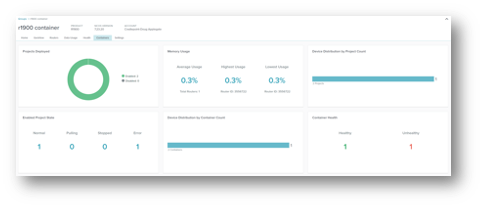

The individual **device dashboard** has a container tab that gives more details about specific containers running on the device:  

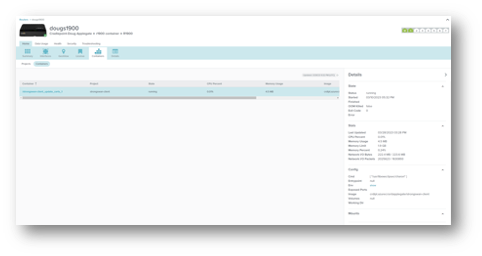

#### Check the logs!

Container output as well as any errors and status from the container controller (cpcontainer) will show up in the local device logs.  

Common issues like incorrect or incompatible YAML files, incorrect license, etc will show up in the logs.  

---

Congratulations, you have completed part 1 of Container Labs!  

Continue to part 2 in the file browser on the left.  
